# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=100, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 5
Data dimension: (1140, 62, 47, 3)
Images flatten dimension: (1140, 8742)


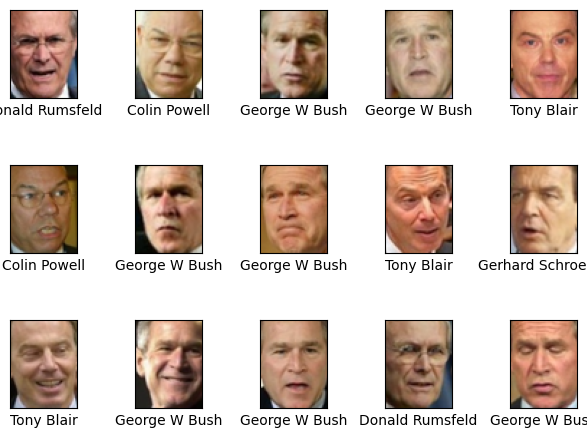

In [3]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

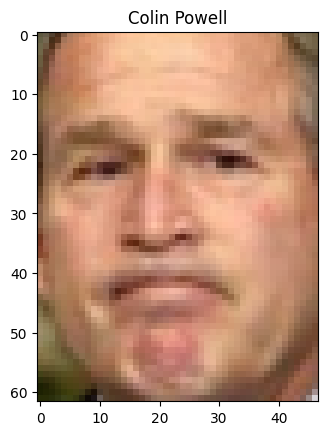

In [4]:
plt.imshow(faces.images[0])
plt.title(faces.target_names[0])
plt.show()

# Preprocessing

In [5]:
# Fungsi untuk memeriksa apakah semua gambar memiliki ukuran yang sama
def size_check(data):
    if len(data) == 0:
        print("No images to check.")
        return False

    for i in range(1, len(data)):
        if data[i].shape != data[0].shape:
            print(f'Image {i} has different size: {data[i].shape} != {data[0].shape}')
            return False
    print('All images have the same size:', data[0].shape)
    return True

# Fungsi untuk memeriksa apakah semua gambar adalah RGB
def color_check(data):
    if len(data) == 0:
        print("No images to check.")
        return False

    for i in range(len(data)):
        if data[i].ndim < 3 or data[i].shape[-1] != 3:
            print(f'Image {i} is not RGB: {data[i].shape[-1]} channels')
            return False
    print('All images are RGB')
    return True

# Jalankan pemeriksaan
size_ok = size_check(faces.images)
color_ok = color_check(faces.images)

# Hasil akhir
if size_ok and color_ok:
    print("Semua gambar memenuhi kriteria ukuran dan warna.")
else:
    print("Ada gambar yang tidak memenuhi kriteria.")

All images have the same size: (62, 47, 3)
All images are RGB
Semua gambar memenuhi kriteria ukuran dan warna.


# Features Extraction

In [6]:
# Fungsi untuk mengekstraksi histogram dari setiap channel RGB
def extract_histogram_features(images, bins_num=5):
    histogram_features = []
    for img in images:
        # Memastikan gambar adalah RGB
        if img.ndim == 3 and img.shape[-1] == 3:
            # Hitung histogram untuk setiap channel
            hist_r, _ = np.histogram(img[:, :, 0], bins=bins_num, range=(0, 1))  # Merah
            hist_g, _ = np.histogram(img[:, :, 1], bins=bins_num, range=(0, 1))  # Hijau
            hist_b, _ = np.histogram(img[:, :, 2], bins=bins_num, range=(0, 1))  # Biru

            # Gabungkan histogram
            hist_combined = np.concatenate((hist_r, hist_g, hist_b))
            histogram_features.append(hist_combined)

    return np.array(histogram_features)

# Ekstraksi histogram dari gambar
X_histograms = extract_histogram_features(faces.images)

# Menampilkan ukuran fitur histogram
print(f'Shape of histogram features: {X_histograms.shape}')


Shape of histogram features: (1140, 15)


# Build Model

In [7]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_histograms, faces.target, test_size=0.2, random_state=42)

# Membuat objek model SVM
model = SVC()

# Proses fitting model
model.fit(X_train, y_train)

SVC()

# Evaluation

In [12]:
# Memprediksi data pelatihan
y_train_pred = model.predict(X_train)

# Memprediksi data pengujian
y_test_pred = model.predict(X_test)

# Evaluasi untuk data pelatihan
print("Evaluasi pada Data Pelatihan:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

# Evaluasi untuk data pengujian
print("Evaluasi pada Data Pengujian:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Evaluasi pada Data Pelatihan:
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.00      0.00      0.00        96
           2       0.46      1.00      0.63       424
           3       0.00      0.00      0.00        87
           4       0.00      0.00      0.00       119

    accuracy                           0.46       912
   macro avg       0.09      0.20      0.13       912
weighted avg       0.22      0.46      0.30       912

Accuracy: 0.4649
Evaluasi pada Data Pengujian:
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        25
           2       0.46      1.00      0.63       106
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        25

    accuracy                           0.46       228
   macro

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Text(113.92222222222219, 0.5, 'predicted label')

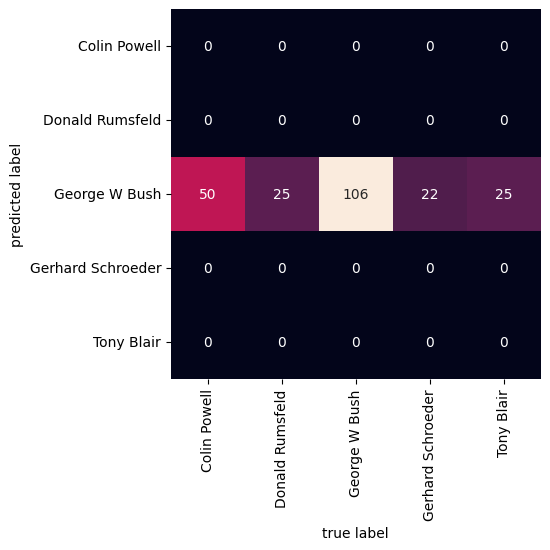

In [13]:
# Eval Confusion Matrix
# This is too large, we may not want it
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Optional

In [22]:
from skimage.filters import gabor

def extract_gabor_features(images):
    gabor_features = []

    for img in images:
        features = []
        for channel in range(3):  # Loop over R, G, B channels
            # Apply Gabor filter to each channel
            real, imag = gabor(img[:, :, channel], frequency=0.6)
            features.extend(real.flatten())
            features.extend(imag.flatten())

        gabor_features.append(np.array(features))

    return np.array(gabor_features)

# Ekstraksi fitur Gabor
X_gabor = extract_gabor_features(faces.images)

# Menampilkan ukuran fitur gabor
print(f'Shape of histogram features: {X_gabor.shape}')

Shape of histogram features: (1140, 17484)


In [24]:
from sklearn.linear_model import LinearRegression
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_gabor, faces.target, test_size=0.2, random_state=42)
# Membuat objek model regresi linier
lr_model = LinearRegression()

# Melatih model menggunakan data latih
lr_model.fit(X_train, y_train)

LinearRegression()

Accuracy on Train (Linear Regression): 30.92%
Accuracy on Test (Linear Regression): 16.67%


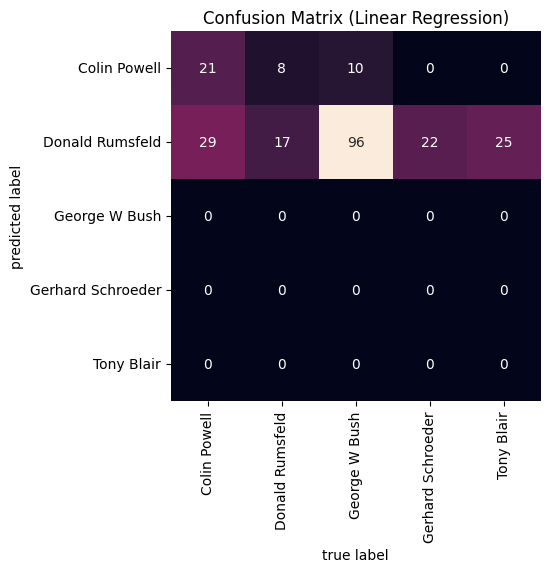

F1-Score (Linear Regression): 0.12


In [29]:
from sklearn.metrics import confusion_matrix, f1_score
# Melakukan prediksi pada data uji
y_test_predict_lr = model.predict(X_test)

# Mengonversi prediksi regresi menjadi kelas
threshold = 0.5  # Ubah sesuai kebutuhan
y_test_predict_classes = (y_test_predict_lr >= threshold).astype(int)

# Evaluasi pada data training
y_train_predict_lr = model.predict(X_train)
y_train_predict_classes = (y_train_predict_lr >= threshold).astype(int)
acc_train_lr = accuracy_score(y_train, y_train_predict_classes)

# Evaluasi pada data testing
acc_test_lr = accuracy_score(y_test, y_test_predict_classes)

# Print hasil akurasi
print(f'Accuracy on Train (Linear Regression): {acc_train_lr:.2%}')
print(f'Accuracy on Test (Linear Regression): {acc_test_lr:.2%}')

# Eval Confusion Matrix
mat_lr = confusion_matrix(y_test, y_test_predict_classes)
sns.heatmap(mat_lr.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix (Linear Regression)')
plt.show()

# F1-Score
f1_lr = f1_score(y_test, y_test_predict_classes, average='weighted')
print(f'F1-Score (Linear Regression): {f1_lr:.2f}')